# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [128]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [129]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [130]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207103e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [131]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.0189654196061


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [132]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738420e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

train_acc:  0.755
val_acc:  0.6
lr  0.095
train_acc:  1.0
val_acc:  1.0
lr  0.09025
train_acc:  1.0
val_acc:  1.0
lr  0.0857375
train_acc:  1.0
val_acc:  1.0
lr  0.08145062499999998
train_acc:  1.0
val_acc:  1.0
lr  0.07737809374999999
train_acc:  1.0
val_acc:  1.0
lr  0.07350918906249998
train_acc:  1.0
val_acc:  1.0
lr  0.06983372960937498
train_acc:  1.0
val_acc:  1.0
lr  0.06634204312890622
train_acc:  1.0
val_acc:  1.0
lr  0.0630249409724609
train_acc:  1.0
val_acc:  1.0
lr  0.05987369392383786
train_acc:  1.0
val_acc:  1.0
lr  0.05688000922764597
train_acc:  1.0
val_acc:  1.0
lr  0.05403600876626367
train_acc:  1.0
val_acc:  1.0
lr  0.05133420832795048
train_acc:  1.0
val_acc:  1.0
lr  0.04876749791155295
train_acc:  1.0
val_acc:  1.0
lr  0.046329123015975304
train_acc:  1.0
val_acc:  1.0
lr  0.04401266686517654
train_acc:  1.0
val_acc:  1.0
lr  0.04181203352191771
train_acc:  1.0
val_acc:  1.0
lr  0.039721431845821824
train_acc:  1.0
val_acc:  1.0
lr  0.037735360253530734
train_

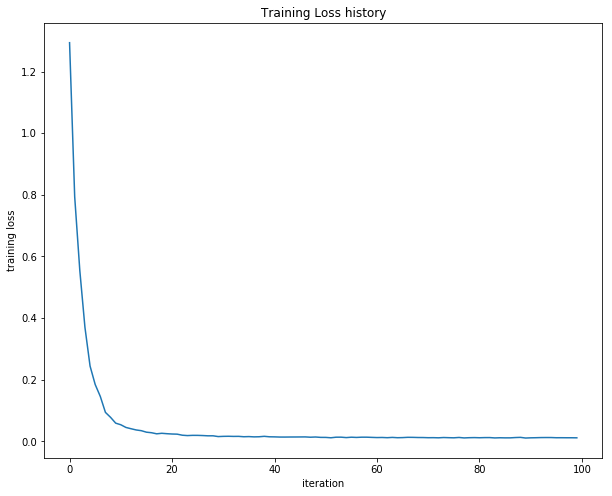

In [134]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [135]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [152]:
input_size = 32 * 32 * 3
hidden_size = 75
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1500, batch_size=200,
            learning_rate=7.5e-4, learning_rate_decay=0.95,
            reg=1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1500: loss 2.303731
train_acc:  0.195
val_acc:  0.132
iteration 100 / 1500: loss 1.917807
iteration 200 / 1500: loss 1.804076
train_acc:  0.42
val_acc:  0.405
iteration 300 / 1500: loss 1.741835
iteration 400 / 1500: loss 1.738570
train_acc:  0.435
val_acc:  0.44
iteration 500 / 1500: loss 1.628984
iteration 600 / 1500: loss 1.585636
iteration 700 / 1500: loss 1.624376
train_acc:  0.55
val_acc:  0.462
iteration 800 / 1500: loss 1.578093
iteration 900 / 1500: loss 1.673836
train_acc:  0.49
val_acc:  0.462
iteration 1000 / 1500: loss 1.548540
iteration 1100 / 1500: loss 1.538190
iteration 1200 / 1500: loss 1.603841
train_acc:  0.63
val_acc:  0.482
iteration 1300 / 1500: loss 1.501615
iteration 1400 / 1500: loss 1.468903
train_acc:  0.535
val_acc:  0.492
Validation accuracy:  0.491


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

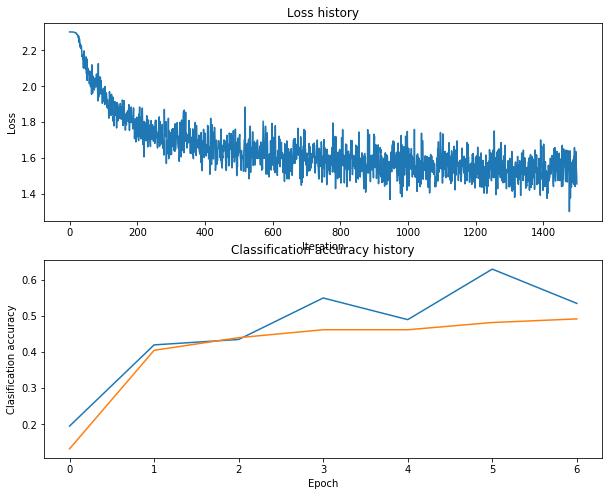

In [153]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

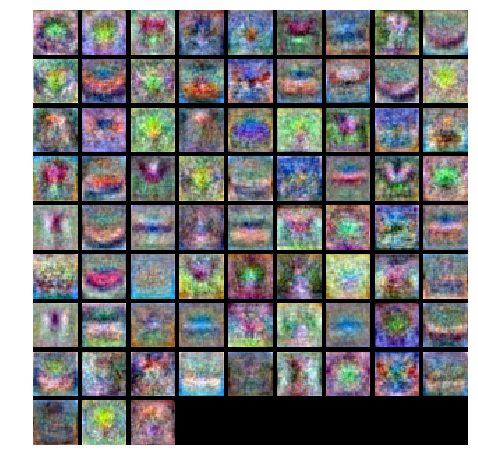

In [154]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

iteration 0 / 3000: loss 2.304074
train_acc:  0.145
val_acc:  0.108
iteration 100 / 3000: loss 2.135465
iteration 200 / 3000: loss 1.875220
train_acc:  0.31
val_acc:  0.328
iteration 300 / 3000: loss 1.872135
iteration 400 / 3000: loss 1.778700
train_acc:  0.345
val_acc:  0.391
iteration 500 / 3000: loss 1.710645
iteration 600 / 3000: loss 1.711930
iteration 700 / 3000: loss 1.602560
train_acc:  0.425
val_acc:  0.441
iteration 800 / 3000: loss 1.605909
iteration 900 / 3000: loss 1.621684
train_acc:  0.48
val_acc:  0.446
iteration 1000 / 3000: loss 1.742701
iteration 1100 / 3000: loss 1.544997
iteration 1200 / 3000: loss 1.625300
train_acc:  0.49
val_acc:  0.468
iteration 1300 / 3000: loss 1.588296
iteration 1400 / 3000: loss 1.451339
train_acc:  0.525
val_acc:  0.475
iteration 1500 / 3000: loss 1.425193
iteration 1600 / 3000: loss 1.390347
iteration 1700 / 3000: loss 1.404632
train_acc:  0.52
val_acc:  0.487
iteration 1800 / 3000: loss 1.449856
iteration 1900 / 3000: loss 1.475002
trai

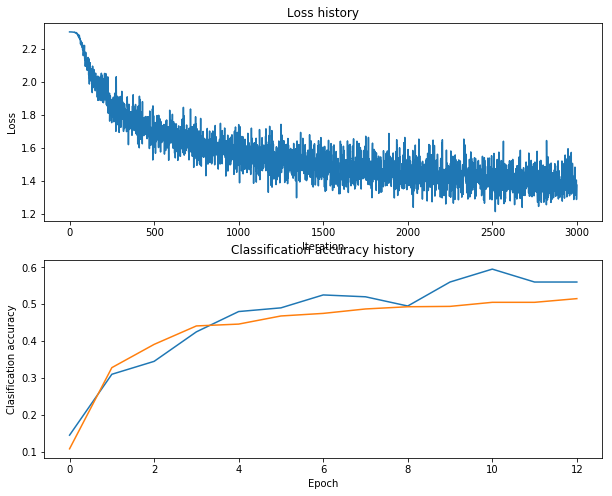

Validation accuracy:  0.506
0.506
iteration 0 / 3000: loss 2.305685
train_acc:  0.08
val_acc:  0.101
iteration 100 / 3000: loss 2.176529
iteration 200 / 3000: loss 1.923112
train_acc:  0.345
val_acc:  0.334
iteration 300 / 3000: loss 1.874851
iteration 400 / 3000: loss 1.744258
train_acc:  0.39
val_acc:  0.405
iteration 500 / 3000: loss 1.689447
iteration 600 / 3000: loss 1.806080
iteration 700 / 3000: loss 1.572413
train_acc:  0.365
val_acc:  0.453
iteration 800 / 3000: loss 1.811145
iteration 900 / 3000: loss 1.616781
train_acc:  0.485
val_acc:  0.448
iteration 1000 / 3000: loss 1.618343
iteration 1100 / 3000: loss 1.718778
iteration 1200 / 3000: loss 1.549409
train_acc:  0.495
val_acc:  0.477
iteration 1300 / 3000: loss 1.523512
iteration 1400 / 3000: loss 1.524121
train_acc:  0.52
val_acc:  0.468
iteration 1500 / 3000: loss 1.626112
iteration 1600 / 3000: loss 1.591382
iteration 1700 / 3000: loss 1.521447
train_acc:  0.545
val_acc:  0.468
iteration 1800 / 3000: loss 1.605807
iterat

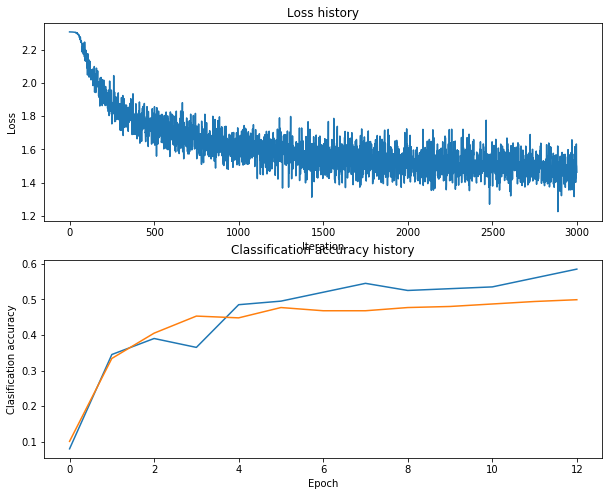

Validation accuracy:  0.506
iteration 0 / 3000: loss 2.304932
train_acc:  0.125
val_acc:  0.121
iteration 100 / 3000: loss 2.140986
iteration 200 / 3000: loss 1.948174
train_acc:  0.345
val_acc:  0.327
iteration 300 / 3000: loss 1.925660
iteration 400 / 3000: loss 1.744927
train_acc:  0.41
val_acc:  0.408
iteration 500 / 3000: loss 1.827600
iteration 600 / 3000: loss 1.586480
iteration 700 / 3000: loss 1.699408
train_acc:  0.46
val_acc:  0.441
iteration 800 / 3000: loss 1.565713
iteration 900 / 3000: loss 1.678041
train_acc:  0.48
val_acc:  0.468
iteration 1000 / 3000: loss 1.562253
iteration 1100 / 3000: loss 1.495592
iteration 1200 / 3000: loss 1.518299
train_acc:  0.455
val_acc:  0.475
iteration 1300 / 3000: loss 1.580298
iteration 1400 / 3000: loss 1.528207
train_acc:  0.475
val_acc:  0.476
iteration 1500 / 3000: loss 1.547863
iteration 1600 / 3000: loss 1.358985
iteration 1700 / 3000: loss 1.408715
train_acc:  0.505
val_acc:  0.483
iteration 1800 / 3000: loss 1.512486
iteration 19

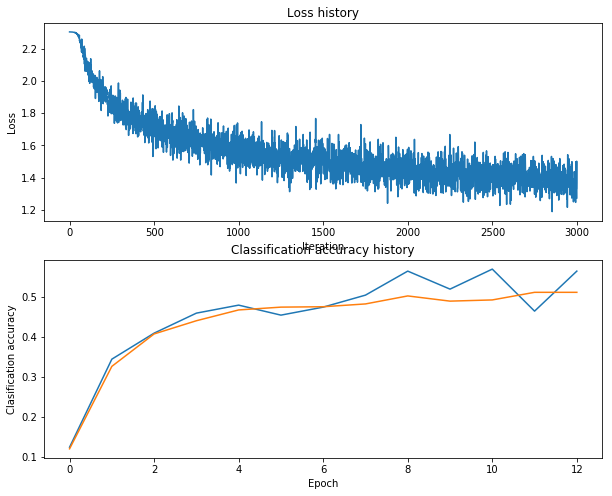

Validation accuracy:  0.513
0.513
iteration 0 / 3000: loss 2.307201
train_acc:  0.115
val_acc:  0.094
iteration 100 / 3000: loss 2.061527
iteration 200 / 3000: loss 1.968952
train_acc:  0.37
val_acc:  0.336
iteration 300 / 3000: loss 1.818160
iteration 400 / 3000: loss 1.788307
train_acc:  0.43
val_acc:  0.394
iteration 500 / 3000: loss 1.733697
iteration 600 / 3000: loss 1.737178
iteration 700 / 3000: loss 1.699588
train_acc:  0.485
val_acc:  0.44
iteration 800 / 3000: loss 1.684075
iteration 900 / 3000: loss 1.625324
train_acc:  0.455
val_acc:  0.455
iteration 1000 / 3000: loss 1.590731
iteration 1100 / 3000: loss 1.611104
iteration 1200 / 3000: loss 1.580376
train_acc:  0.49
val_acc:  0.461
iteration 1300 / 3000: loss 1.527120
iteration 1400 / 3000: loss 1.476828
train_acc:  0.5
val_acc:  0.467
iteration 1500 / 3000: loss 1.586506
iteration 1600 / 3000: loss 1.483500
iteration 1700 / 3000: loss 1.559512
train_acc:  0.485
val_acc:  0.484
iteration 1800 / 3000: loss 1.588188
iteration

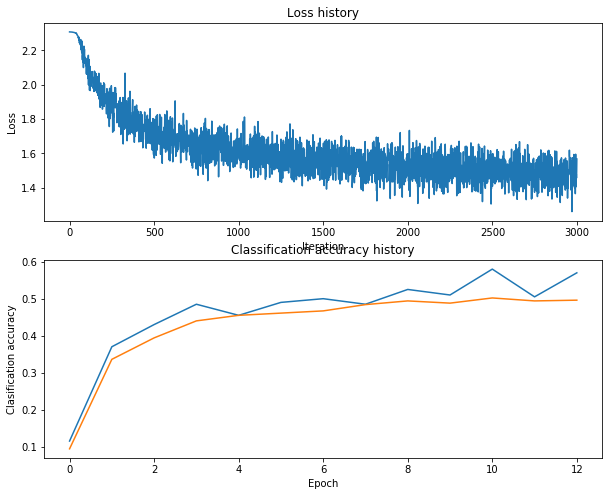

Validation accuracy:  0.504
iteration 0 / 3000: loss 2.305654
train_acc:  0.11
val_acc:  0.151
iteration 100 / 3000: loss 2.116700
iteration 200 / 3000: loss 1.872431
train_acc:  0.3
val_acc:  0.334
iteration 300 / 3000: loss 1.839370
iteration 400 / 3000: loss 1.726502
train_acc:  0.39
val_acc:  0.395
iteration 500 / 3000: loss 1.664091
iteration 600 / 3000: loss 1.643292
iteration 700 / 3000: loss 1.707504
train_acc:  0.49
val_acc:  0.45
iteration 800 / 3000: loss 1.595672
iteration 900 / 3000: loss 1.614406
train_acc:  0.5
val_acc:  0.468
iteration 1000 / 3000: loss 1.574587
iteration 1100 / 3000: loss 1.476763
iteration 1200 / 3000: loss 1.617985
train_acc:  0.47
val_acc:  0.46
iteration 1300 / 3000: loss 1.476778
iteration 1400 / 3000: loss 1.551168
train_acc:  0.505
val_acc:  0.481
iteration 1500 / 3000: loss 1.464076
iteration 1600 / 3000: loss 1.561152
iteration 1700 / 3000: loss 1.489418
train_acc:  0.43
val_acc:  0.473
iteration 1800 / 3000: loss 1.514743
iteration 1900 / 300

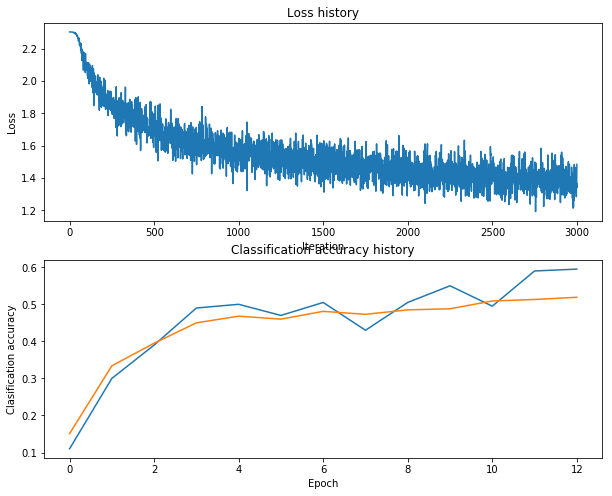

Validation accuracy:  0.516
0.516
iteration 0 / 3000: loss 2.308704
train_acc:  0.135
val_acc:  0.1
iteration 100 / 3000: loss 2.037334
iteration 200 / 3000: loss 1.811911
train_acc:  0.37
val_acc:  0.329
iteration 300 / 3000: loss 1.771104
iteration 400 / 3000: loss 1.808298
train_acc:  0.39
val_acc:  0.405
iteration 500 / 3000: loss 1.678939
iteration 600 / 3000: loss 1.638759
iteration 700 / 3000: loss 1.647746
train_acc:  0.46
val_acc:  0.459
iteration 800 / 3000: loss 1.667379
iteration 900 / 3000: loss 1.503123
train_acc:  0.385
val_acc:  0.468
iteration 1000 / 3000: loss 1.570129
iteration 1100 / 3000: loss 1.539187
iteration 1200 / 3000: loss 1.637369
train_acc:  0.49
val_acc:  0.457
iteration 1300 / 3000: loss 1.610007
iteration 1400 / 3000: loss 1.558961
train_acc:  0.495
val_acc:  0.482
iteration 1500 / 3000: loss 1.572374
iteration 1600 / 3000: loss 1.625068
iteration 1700 / 3000: loss 1.496454
train_acc:  0.495
val_acc:  0.472
iteration 1800 / 3000: loss 1.484892
iteration

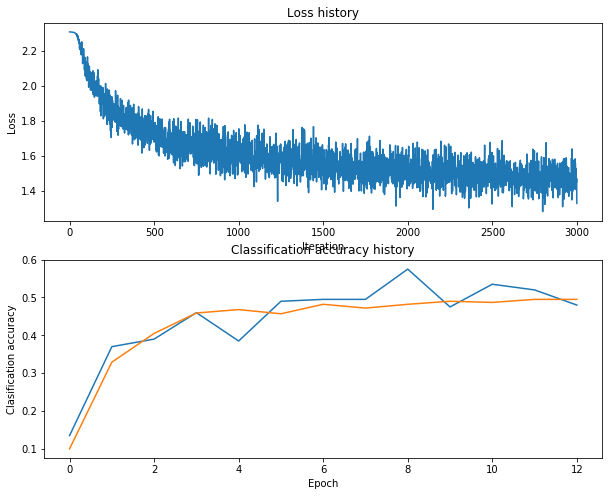

Validation accuracy:  0.503
iteration 0 / 3000: loss 2.306355
train_acc:  0.11
val_acc:  0.119
iteration 100 / 3000: loss 2.048060
iteration 200 / 3000: loss 1.942814
train_acc:  0.31
val_acc:  0.337
iteration 300 / 3000: loss 1.742557
iteration 400 / 3000: loss 1.754537
train_acc:  0.4
val_acc:  0.418
iteration 500 / 3000: loss 1.780314
iteration 600 / 3000: loss 1.686961
iteration 700 / 3000: loss 1.542406
train_acc:  0.435
val_acc:  0.449
iteration 800 / 3000: loss 1.606547
iteration 900 / 3000: loss 1.591244
train_acc:  0.465
val_acc:  0.462
iteration 1000 / 3000: loss 1.525283
iteration 1100 / 3000: loss 1.451084
iteration 1200 / 3000: loss 1.561745
train_acc:  0.465
val_acc:  0.471
iteration 1300 / 3000: loss 1.476756
iteration 1400 / 3000: loss 1.551893
train_acc:  0.49
val_acc:  0.47
iteration 1500 / 3000: loss 1.516255
iteration 1600 / 3000: loss 1.428057
iteration 1700 / 3000: loss 1.355344
train_acc:  0.49
val_acc:  0.469
iteration 1800 / 3000: loss 1.560869
iteration 1900 /

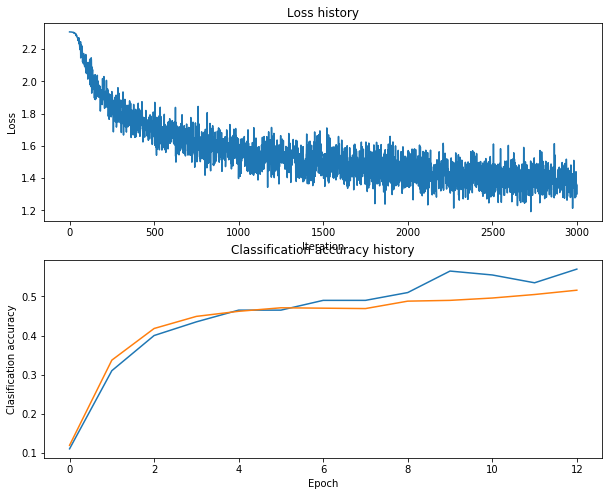

Validation accuracy:  0.51
iteration 0 / 3000: loss 2.310333
train_acc:  0.09
val_acc:  0.084
iteration 100 / 3000: loss 2.041058
iteration 200 / 3000: loss 1.877156
train_acc:  0.275
val_acc:  0.344
iteration 300 / 3000: loss 1.741882
iteration 400 / 3000: loss 1.823031
train_acc:  0.41
val_acc:  0.412
iteration 500 / 3000: loss 1.682705
iteration 600 / 3000: loss 1.611460
iteration 700 / 3000: loss 1.668461
train_acc:  0.4
val_acc:  0.443
iteration 800 / 3000: loss 1.745694
iteration 900 / 3000: loss 1.737440
train_acc:  0.42
val_acc:  0.457
iteration 1000 / 3000: loss 1.621038
iteration 1100 / 3000: loss 1.584495
iteration 1200 / 3000: loss 1.755224
train_acc:  0.48
val_acc:  0.449
iteration 1300 / 3000: loss 1.526064
iteration 1400 / 3000: loss 1.561499
train_acc:  0.46
val_acc:  0.47
iteration 1500 / 3000: loss 1.636602
iteration 1600 / 3000: loss 1.490334
iteration 1700 / 3000: loss 1.630866
train_acc:  0.5
val_acc:  0.478
iteration 1800 / 3000: loss 1.481576
iteration 1900 / 300

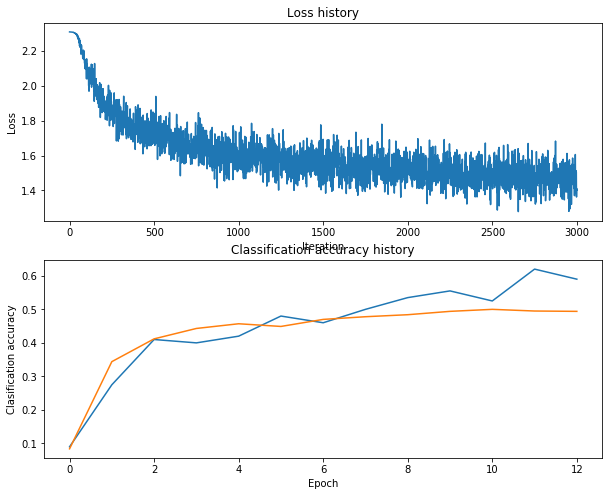

Validation accuracy:  0.506
numNeurons 200.000000 lr 1.000000e-04 reg 5.000000e-01 train accuracy: 0.547163 val accuracy: 0.506000
numNeurons 200.000000 lr 1.000000e-04 reg 1.000000e+00 train accuracy: 0.534714 val accuracy: 0.506000
numNeurons 300.000000 lr 1.000000e-04 reg 5.000000e-01 train accuracy: 0.551020 val accuracy: 0.513000
numNeurons 300.000000 lr 1.000000e-04 reg 1.000000e+00 train accuracy: 0.534918 val accuracy: 0.504000
numNeurons 400.000000 lr 1.000000e-04 reg 5.000000e-01 train accuracy: 0.551633 val accuracy: 0.516000
numNeurons 400.000000 lr 1.000000e-04 reg 1.000000e+00 train accuracy: 0.539408 val accuracy: 0.503000
numNeurons 500.000000 lr 1.000000e-04 reg 5.000000e-01 train accuracy: 0.558367 val accuracy: 0.510000
numNeurons 500.000000 lr 1.000000e-04 reg 1.000000e+00 train accuracy: 0.541469 val accuracy: 0.506000
best validation accuracy achieved during cross-validation: 0.516000


In [156]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
results = {}
best_val = -1
from past.builtins import xrange
learning_rates = [1e-4]
regularization_strengths = [5e-1, 1e0]
neuronsInHidden = [200, 300, 400, 500]

input_size = 32 * 32 * 3
num_classes = 10

for numNeurons in neuronsInHidden:
    for rate in learning_rates:
        for l2Val in regularization_strengths:
            net = TwoLayerNet(input_size, numNeurons, num_classes)
            # Train the network
            stats = net.train(X_train, y_train, X_val, y_val,
                        num_iters=3000, batch_size=200,
                        learning_rate = rate, learning_rate_decay=0.95,
                        reg=l2Val, verbose=True)
            
            # Plot the loss function and train / validation accuracies
            plt.subplot(2, 1, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')

            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Clasification accuracy')
            plt.show()

            # Predict on the validation set
            val_acc = (net.predict(X_val) == y_val).mean()
            print('Validation accuracy: ', val_acc)
            train_acc = (net.predict(X_train) == y_train).mean()
      
            if (best_val < val_acc):
                best_val = val_acc
                print (best_val)
                best_net = net
            results[(numNeurons, rate, l2Val)] = (train_acc, val_acc)
    
# Print out results.
for numNeurons, lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(numNeurons, lr, reg)]
    print('numNeurons %f lr %e reg %e train accuracy: %f val accuracy: %f' % (
                numNeurons, lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

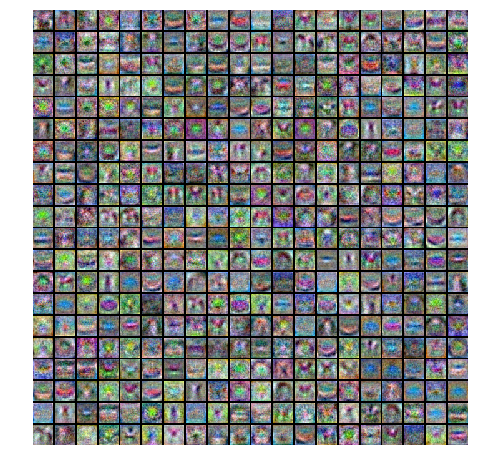

In [157]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [158]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.519
